# Udacity Data Science Blog Project - The CRISP-DM Process (Seattle AirBNB Data)

# 1) Business Understanding

The following Airbnb activity is included in this Seattle dataset:
- Listings, including full descriptions and average review score.
- Reviews, including unique id for each reviewer and detailed comments.
- Calendar, including listing id and the price and availability for that day.

## Exploratory Questions
1. What is the effect of the number of bedrooms, the number of bathrooms, and the number of beds on the price of the listings?
2. What is the average price of listings based on the number of bedrooms?
3. What is the average price of listings based on the type of room?
4. Which neighbourhoods are the top 10 most expensive and what is the review ratings for listings in these neighbourhoods?
5. What is the price trend over the months and what season is the listing prices the highest?

## Price Modeling
- What factors are responsible for the price of the listings? 

> Price is often considered as one of the key factors that impacts clients' selection of listings. Some other attributes that help guests in deciding on a listing are including host attributes, site and property attributes, amenities and services, rental rules, and online review ratings. However, the extent to which these factors contribute to the listing prices should be investigated.

# 2) Data Understanding

In [1]:
# Import libraries for analysis
import calendar
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

In [2]:
# Load seattle data sets into pandas dataframes
calendar_df = pd.read_csv('seattle_calendar.csv')
listings_df = pd.read_csv('seattle_listings.csv')
reviews_df = pd.read_csv('seattle_reviews.csv')

## 2.1 Assessing Data

In [3]:
# View the first five rows in the calendar df
calendar_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
# View the first five rows in the listings df
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
# View the first five rows in the reviews df
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [6]:
# Check shape of the calendar dataframe
calendar_df.shape

(1393570, 4)

In [7]:
# Check shape of the listings dataframe
listings_df.shape

(3818, 92)

In [8]:
# Check shape of the reviews dataframe
reviews_df.shape

(84849, 6)

In [9]:
# Check info of the calendar dataframe
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [10]:
# Check the info of the reviews dataframe
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [11]:
# Check the info of the listings dataframe
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [12]:
# Check descriptive statistics of the listings dataframe
listings_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


### NOTE
- After assessing the calendar dataframe, i found that the dataframe contains 1393570 rows, and 4 columns. i also found that the price column contains `$` sign, therefore, this column will need to be cleaned. The date column in the calendar dataframe need to be converted to the correct data type.
- An assessment of the listings dataframe revealed that the dattaframe contains 3818 rows, and 92 columns. I also found that the columns that refers to fees or prices related to the listings have `$` sign. 
- The reviews dataframe has 84849 rows, and 6 columns.

# 3) Prepare Data

# 3.1. Explore the Calendar Dataframe

In [13]:
# Convert the date columns in the calendar dataframe and reviews dataframe to datetime
calendar_df['date'] = pd.to_datetime(calendar_df['date'])

In [14]:
# Remove the dollar sign from the price column in the calendar dataframe and convert the column to float
calendar_df['price'] = calendar_df['price'].apply(lambda x: x.replace('$', '').replace(',', '')
                                if isinstance(x, str) else x).astype(float)

In [15]:
# View value counts for the available 
calendar_df.available.value_counts()

t    934542
f    459028
Name: available, dtype: int64

In [16]:
# drop rows in the calendar dataframe where the houses are not available and has the value 'f'
calendar_df = calendar_df.query('available == "t"')

In [17]:
# Confirm that the rows with 'f' values are dropped
calendar_df.available.value_counts()

t    934542
Name: available, dtype: int64

**Note:** I dropped the rows where availability is false.

# 3.2. Explore the Listings Dataframe

In [18]:
# Check for minimum numnber of bedrooms, bathrooms, and beds for the listings
print(listings_df.bedrooms.min())
print(listings_df.bathrooms.min())
print(listings_df.beds.min())

0.0
0.0
1.0


In [19]:
# Drop listings with 0 bedrooms, 0 beds, and less than 1 bathroom.
listings_df = listings_df.query('bedrooms > 0.0')
listings_df = listings_df.query('bathrooms >= 1.0')
listings_df = listings_df.query('beds > 0.0')

In [20]:
# Remove the dollar sign from the price column in the listings dataframe and convert the column to float
listings_df['price'] = listings_df['price'].apply(lambda x: x.replace('$', '').replace(',', '')if isinstance(x, str) else x).astype(float)

# 3.3. Exploratory Data Analysis

# What is the effect of the number of bedrooms, the number of bathrooms, and the number of beds on the price of the listings?

In [21]:
# Create a list of numerical variables
num_vars = ['bedrooms', 'bathrooms', 'beds', 'price']

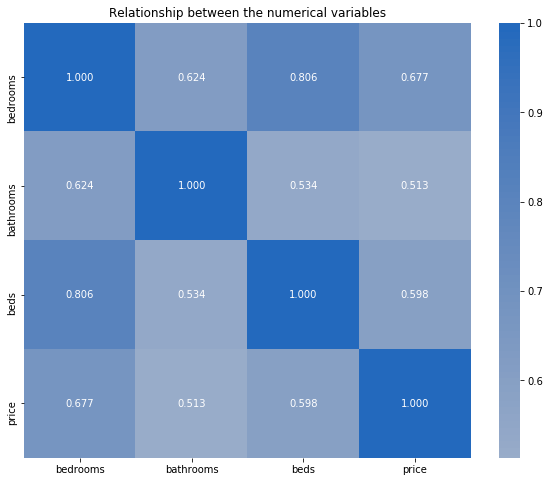

In [22]:
# Plot correlation heatmap of the numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(listings_df[num_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.title('Relationship between the numerical variables');

## Insight
The heatmap above shows that the relationship between these variables are positively correlated. This means that an increase in one variable leads to an increase in the other variable.

Bedrooms vs Bathrooms: There is a positive moderate correlation between these variables. Understandably, it makes sense that the number of bedrooms in a house will correlate with the number of bathrooms.

Bedrooms vs Beds: The relationship between these variables is a strong positive correlation.

The effect of these variables on the price is positive. This means that all of these variables are determinant of a house listing price.

# What is the average price of listings based on the number of bedrooms?

In [23]:
# Find the average price of listings based on the number of bedrooms
listings_df.groupby(['bedrooms'])['price'].mean()

bedrooms
1.0     95.997046
2.0    174.199372
3.0    249.530035
4.0    313.695652
5.0    441.000000
6.0    578.166667
7.0    375.000000
Name: price, dtype: float64

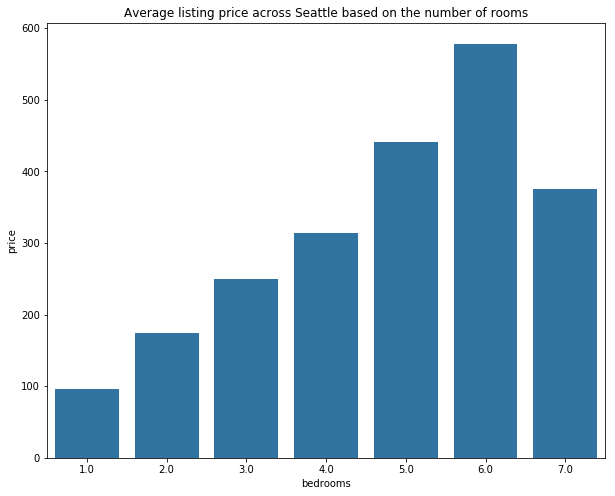

In [24]:
# Plot a bar chart of the average price listings based on the number of bedrooms
figsize = (10, 8)
base_color = sns.color_palette()[0]
fig = plt.figure(figsize = figsize)
sns.barplot(data = listings_df, x = 'bedrooms', y = 'price', ci=None, color=base_color)
plt.title('Average listing price across Seattle based on the number of rooms');

## Insight
The plot above shows the average listing price for the varying number of bedrooms from 1 bedroom to 7 bedrooms, the listings that are most expensive turn out to be the listings with more bedrooms, with 6 bedroom listings being the most expensive.

# What is the average price of listings based on the type of room?

In [25]:
# Find the average price of listings based on the room type
listings_df.groupby(['room_type'])['price'].mean()

room_type
Entire home/apt    165.308516
Private room        74.834361
Shared room         47.009434
Name: price, dtype: float64

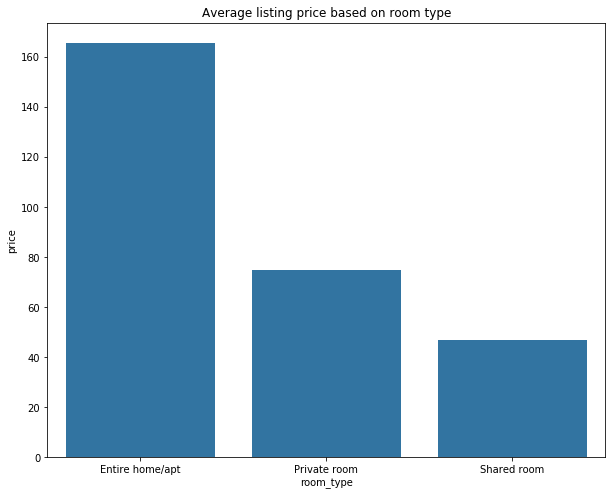

In [52]:
# Plot a bar chart of the average price listings based on the room type
figsize = (10, 8)
base_color = sns.color_palette()[0]
fig = plt.figure(figsize = figsize)
sns.barplot(data= listings_df, x = 'room_type', y = 'price', ci=None, color=base_color)
plt.title('Average listing price based on room type');

## Insight
The plot above shows that the average listing price of an entire home/apartment is higher than the average listing price of a private room or a shared room. While the average listing price of a private room is higher than the average listing price of a shared room.

# Which neighbourhoods are the top 10 most expensive and what is the review ratings for listings in these neighbourhoods?

In [27]:
# Explore the prices and review scores rating of the top 10 most expensive cities
listings_df.groupby('neighbourhood')[['price', 'review_scores_rating']].mean().nlargest(10, ['price', 'review_scores_rating'])

,price,review_scores_rating
neighbourhood,,
Fairmount Park,370.000000,NaN
Portage Bay,241.428571,95.785714
Industrial District,235.000000,91.500000
Montlake,218.266667,96.750000
Westlake,207.181818,96.000000
Alki,201.045455,95.714286
Pike Place Market,189.500000,95.521739
Belltown,180.910828,93.309353
Magnolia,177.500000,94.837209


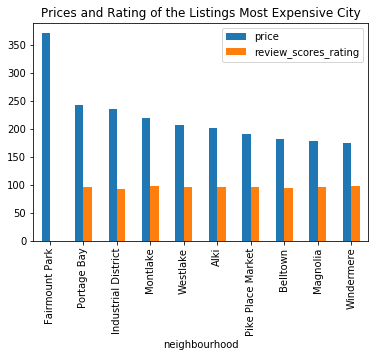

In [28]:
# Plot a bar chart to visualize prices and review scores rating of the top 10 most expensive cities
listings_df.groupby('neighbourhood')[['price', 'review_scores_rating']].mean().nlargest(10, ['price', 'review_scores_rating']).plot(kind='bar')
plt.title('Prices and Rating of the Listings Most Expensive City');

## Insight
The exploration of the top 10 most expensive cities and their review scores rating shows that while there is no rating scores data for the most expensive neighbourhood, the ratings scores for the other neighbourhood reveals that the most expensive neighbourhoods have rating scores greater than 90. However, the distribution of the rating scores amongst these neighbourhood shows that the least expensive neighbourhood with an average listing price of $175 has a very high rating of 97.5.

# What is the price trend over the months and what season is the listing prices the highest? 

In [29]:
# Extract months from the date column in the calendar dataframe
calendar_df['month'] = pd.DatetimeIndex(calendar_df['date']).month
calendar_df.head()

,listing_id,date,available,price,month
0,241032,2016-01-04,t,85.0,1
1,241032,2016-01-05,t,85.0,1
9,241032,2016-01-13,t,85.0,1
10,241032,2016-01-14,t,85.0,1
14,241032,2016-01-18,t,85.0,1


In [30]:
# Convert the numeric month values to text abbreviation
calendar_df['month'] = calendar_df['month'].apply(lambda x: calendar.month_abbr[x])

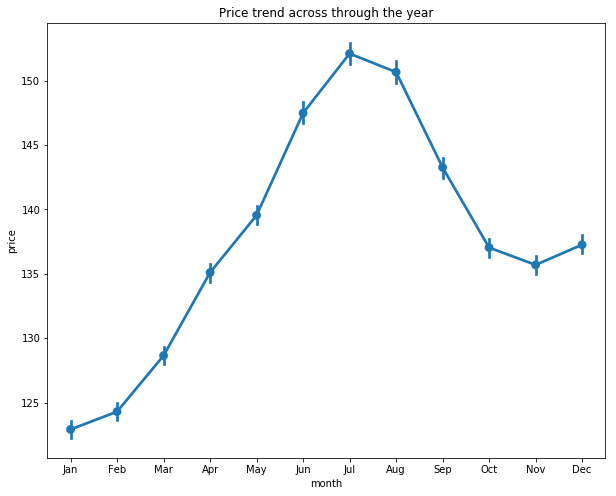

In [31]:
# Plot a point plot to show the price trend across the months
figsize = (10, 8)
fig = plt.figure(figsize = figsize)
sns.pointplot(data = calendar_df, x = 'month', y = 'price')
plt.title('Price trend across through the year');

## Insight
The point plot above shows that throughout the year, the month when the listing price is high is july. An interesting thing to note is the high price between June and August, this means that during the summer, the prices usually go up, and the prices are at the lowest between January and March.

# Deciding what features to keep

For this section, I will be checking to see the various variables that influence the prices of the listings. The steps i will follow are highlighted below:
- The data set contains a lot of variables that does not actually influence the price. I will be dropping some of these variables.
- I will assign the chosen features to a data frame.
- I will check the properties of the data frame.
- I will clean some of the columns by removing the dollar sign in the security_deposit, cleaning_fee, and extra_people columns.
- I will also remove the percent sign in the host_response_rate, and host_acceptance_rate columns.
- I will replace null values in the host_response_time, host_response_rate, and host_acceptance_rate columns with N/A.
- For the property_type column, i will drop the rows with null values.
- I will fill all null values in the columns pertaining to review score with 0.
- For the columns that contain text, i will write a function to convert it to boolean, the rows with text will have the value of 1, while null values will have 0.
- For the columns that contain true or false values, i will write a function that will return 1 for true values and 0 for false values.
- I will explore the amenities column and select some features.

In [32]:
# Create a list of decided features and put them in a dataframe
cols = [ 'amenities', 'bathrooms', 'bed_type', 'bedrooms', 'beds', 'picture_url', 
        'cancellation_policy', 'extra_people', 'host_identity_verified',
        'instant_bookable', 'transit', 'price', 'property_type', 'room_type', 
        'requires_license', 'require_guest_phone_verification', 
        'host_response_rate', 'host_response_time', 'description','neighborhood_overview', 'maximum_nights', 
        'minimum_nights', 'summary', 'host_location', 'review_scores_rating', 'host_acceptance_rate', 
        'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin', 'host_is_superhost', 
        'review_scores_communication','review_scores_location','review_scores_value', 'security_deposit', 'cleaning_fee',
      'space', 'notes', 'host_neighbourhood']

cleaned_listings_df = listings_df[cols]

In [33]:
# View properties of the new dataframe
cleaned_listings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3817
Data columns (total 38 columns):
amenities                           3390 non-null object
bathrooms                           3390 non-null float64
bed_type                            3390 non-null object
bedrooms                            3390 non-null float64
beds                                3390 non-null float64
picture_url                         3390 non-null object
cancellation_policy                 3390 non-null object
extra_people                        3390 non-null object
host_identity_verified              3389 non-null object
instant_bookable                    3390 non-null object
transit                             2567 non-null object
price                               3390 non-null float64
property_type                       3389 non-null object
room_type                           3390 non-null object
requires_license                    3390 non-null object
require_guest_phone_verification  

In [34]:
# Check shape of the new dataframe
cleaned_listings_df.shape

(3390, 38)

In [35]:
# Replace null values with N/A in the host_response_rate, and host_response time columns
cleaned_listings_df['host_response_time'] = cleaned_listings_df['host_response_time'].fillna('N/A')
cleaned_listings_df['host_response_rate'] = cleaned_listings_df['host_response_rate'].apply(lambda x: 0 if x == 'N/A' else x)
cleaned_listings_df['host_acceptance_rate'] = cleaned_listings_df['host_acceptance_rate'].apply(lambda x: 0 if x == 'N/A' else x)

# Remove the % sign in the host_response_rate column
cleaned_listings_df['host_response_rate'] = cleaned_listings_df['host_response_rate'].apply(lambda x: x.replace('%', '')
                                if isinstance(x, str) else x).astype(float)
cleaned_listings_df['host_acceptance_rate'] = cleaned_listings_df['host_acceptance_rate'].apply(lambda x: x.replace('%', '')
                                if isinstance(x, str) else x).astype(float)
cleaned_listings_df['security_deposit'] = cleaned_listings_df['security_deposit'].apply(lambda x: x.replace('$', '').replace(',', '')
                                if isinstance(x, str) else x).astype(float)
cleaned_listings_df['cleaning_fee'] = cleaned_listings_df['cleaning_fee'].apply(lambda x: x.replace('$', '').replace(',', '')
                                if isinstance(x, str) else x).astype(float)
cleaned_listings_df['extra_people'] = cleaned_listings_df['extra_people'].apply(lambda x: x.replace('$', '').replace(',', '')if isinstance(x, str) else x).astype(float)
cleaned_listings_df['host_response_rate'] = cleaned_listings_df['host_response_rate'].fillna(0)
cleaned_listings_df['host_acceptance_rate'] = cleaned_listings_df['host_acceptance_rate'].fillna(0)


# Drop record with empty value for property_type
cleaned_listings_df = cleaned_listings_df.dropna(subset=['property_type'], axis=0)

C:\Users\obisa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\obisa\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\obisa\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [36]:
# Review all the numerical columns and assess missing values
num_columns = cleaned_listings_df.select_dtypes(include=['float', 'int']).columns
for col in num_columns:
    print(col, cleaned_listings_df[col].isnull().sum())

bathrooms 0
bedrooms 0
beds 0
extra_people 0
price 0
host_response_rate 0
review_scores_rating 565
host_acceptance_rate 0
review_scores_accuracy 576
review_scores_cleanliness 571
review_scores_checkin 576
review_scores_communication 569
review_scores_location 573
review_scores_value 574
security_deposit 1737
cleaning_fee 911


In [37]:
# Fill all review scores columns with 0 for Nan values
col_fillna = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
              'review_scores_checkin','review_scores_communication','review_scores_location',
              'review_scores_value', 'security_deposit', 'cleaning_fee']
for col in col_fillna:
    cleaned_listings_df[col] = cleaned_listings_df[col].fillna(0)

In [38]:
# Review all the numerical columns and assess missing values
num_columns = cleaned_listings_df.select_dtypes(include=['float', 'int']).columns
for col in num_columns:
    print(col, cleaned_listings_df[col].isnull().sum())

bathrooms 0
bedrooms 0
beds 0
extra_people 0
price 0
host_response_rate 0
review_scores_rating 0
host_acceptance_rate 0
review_scores_accuracy 0
review_scores_cleanliness 0
review_scores_checkin 0
review_scores_communication 0
review_scores_location 0
review_scores_value 0
security_deposit 0
cleaning_fee 0


In [39]:
# Review all the categorical columns and assess missing values
num_columns = cleaned_listings_df.select_dtypes(include=['object']).columns
for col in num_columns:
    print(col, cleaned_listings_df[col].isnull().sum())

amenities 0
bed_type 0
picture_url 0
cancellation_policy 0
host_identity_verified 1
instant_bookable 0
transit 823
property_type 0
room_type 0
requires_license 0
require_guest_phone_verification 0
host_response_time 0
description 0
neighborhood_overview 910
summary 156
host_location 4
host_is_superhost 1
space 496
notes 1432
host_neighbourhood 263


In [40]:
# Function to set all columns with strings to boolean
def set_str_bool(string):
    '''
    Function to set all columns with strings to boolean
    INPUT:
    string - the string that needs to be converted into a boolean value 
    OUTPUT:
    Boolean 0 or 1 - Returns 0 if no string passed, 1 otherwise represent the string with a value
    
    Converts the columns with text values into a boolean, while representing the presence or absence of a string
    '''
    if not string:
        return 0
    else:
        return 1


string_columns = ['summary', 'space', 'neighborhood_overview', 'notes', 'transit', 'picture_url',
                  'description', 'host_location', 'host_neighbourhood']
for string in string_columns:
    cleaned_listings_df[string] = cleaned_listings_df[string].apply(set_str_bool)

In [41]:
# Function to set all true or false values to 1 and 0
def set_bool_true_false(true_false_value):
    '''
    Function to set all true or false values to 1 and 0
    INPUT:
    true_false_value - the true or false value that has 't' or 'f' value that I want to convert to boolean
    OUTPUT:
    Boolean 0 or 1 - Returns 0 if false, 1 for true
    
    Converts a true or false value into a boolean with 1 or 0
    '''
    if true_false_value == 't':
        return 1
    else: 
        return 0

true_false_columns = ['host_identity_verified', 'requires_license','instant_bookable',
                      'require_guest_phone_verification', 'host_is_superhost']
for t_value in true_false_columns:
    cleaned_listings_df[t_value] = cleaned_listings_df[t_value].apply(set_bool_true_false)

In [42]:
# Explore amenities column
cleaned_listings_df.amenities.head()

0    {TV,"Cable TV",Internet,"Wireless Internet","A...
1    {TV,Internet,"Wireless Internet",Kitchen,"Free...
2    {TV,"Cable TV",Internet,"Wireless Internet","A...
4    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
5    {"Wireless Internet","Free Parking on Premises...
Name: amenities, dtype: object

In [43]:
# Clean amenities column
clean_amenities = []
for index, row in cleaned_listings_df.iterrows():
    row['amenities'] = row['amenities'].replace('{','')
    row['amenities'] = row['amenities'].replace('}','')
    row['amenities'] = row['amenities'].replace('"','')
    new_list = row['amenities'].split(',')
    for word in new_list:
        clean_amenities.append(word)
    
count_amenities = Counter(clean_amenities)
count_amenities.most_common()

[('Wireless Internet', 3268),
 ('Heating', 3230),
 ('Kitchen', 3035),
 ('Smoke Detector', 2932),
 ('Essentials', 2881),
 ('Dryer', 2709),
 ('Washer', 2706),
 ('Internet', 2504),
 ('Shampoo', 2387),
 ('TV', 2328),
 ('Carbon Monoxide Detector', 2222),
 ('Free Parking on Premises', 2007),
 ('Fire Extinguisher', 1998),
 ('Family/Kid Friendly', 1815),
 ('First Aid Kit', 1546),
 ('Cable TV', 1317),
 ('Indoor Fireplace', 863),
 ('Pets live on this property', 810),
 ('Hangers', 727),
 ('Hair Dryer', 668),
 ('Safety Card', 666),
 ('Elevator in Building', 660),
 ('Iron', 638),
 ('Laptop Friendly Workspace', 638),
 ('Air Conditioning', 603),
 ('24-Hour Check-in', 531),
 ('Dog(s)', 465),
 ('Buzzer/Wireless Intercom', 451),
 ('Pets Allowed', 425),
 ('Gym', 386),
 ('Cat(s)', 349),
 ('Hot Tub', 274),
 ('Breakfast', 273),
 ('Wheelchair Accessible', 264),
 ('Suitable for Events', 196),
 ('Pool', 142),
 ('Lock on Bedroom Door', 97),
 ('Doorman', 79),
 ('Smoking Allowed', 70),
 ('Other pet(s)', 48),
 (''

In [44]:
# Clean amenities column
amenities_column =['amenities_wireless_internet|Wireless Internet', 'amenities_heating|Heating', 'amenities_kitchen|Kitchen',
                   'amenities_smoke_detector|Smoke Detector', 'amenities_essentials|Essentials', 'amenities_dryer|Dryer',
                   'amenities_washer|Washer', 'amenities_internet|Internet', 'amenities_shampoo|Shampoo', 
                   'amenities_tv|TV', 'amenities_carbon_monoxide_detector|Carbon Monoxide Detector',
                   'amenities_fire_extinguisher|Fire Extinguisher', 'amenities_family_kid_fiendly|Family/Kid Friendly', 
                   'amenities_first_aid_kit|First Aid Kit', 'amenities_air_conditioning|Air Conditioning', 
                   'amenities_free_parking_on_premises|Free Parking on Premises', 'amenities_hangers|Hangers', 
                   'amenities_laptop_friendly_workspace|Laptop Friendly Workspace', 'amenities_hair_dryer|Hair Dryer',
                   'amenities_24_hour_check_in|24-Hour Check-in', 'amenities_cable_tv|Cable TV']
for col in amenities_column:
    col_name, col_desc = col.split('|')
    cleaned_listings_df[col_name] = cleaned_listings_df['amenities'].apply(lambda x: 1 if col_desc in x else 0)

In [45]:
# Drop the original amenities field
cleaned_listings_df = cleaned_listings_df.drop('amenities', axis = 1)

## Findings

- After reviewing the amenities column, I found that the features are enclosed in a curly brackets, and separated by comma. The first action was to strip the excesses like the bracket, and the quotations before splitting the words and appending it to an empty list. I used the counter function to count the number of occurrence for each word.
- I decided to choose features with counts greater than 500.

In [46]:
# View the object columns
cleaned_listings_df.select_dtypes(include=['object']).columns

Index(['bed_type', 'cancellation_policy', 'property_type', 'room_type',
       'host_response_time'],
      dtype='object')

In [47]:
# Get Dummies for categorical variables
cat_vars = cleaned_listings_df.select_dtypes(include=['object']).columns

cleaned_listings_df = pd.get_dummies(cleaned_listings_df, columns = cat_vars)
cleaned_listings_df.head()

,bathrooms,bedrooms,beds,picture_url,extra_people,host_identity_verified,instant_bookable,transit,price,requires_license,...,property_type_Townhouse,property_type_Treehouse,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,host_response_time_N/A,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour
0,1.0,1.0,1.0,1,5.0,1,0,1,85.0,0,...,0,0,1,0,0,0,0,0,1,0
1,1.0,1.0,1.0,1,0.0,1,0,1,150.0,0,...,0,0,1,0,0,0,0,0,0,1
2,4.5,5.0,7.0,1,25.0,1,0,1,975.0,0,...,0,0,1,0,0,0,0,0,1,0
4,2.0,3.0,3.0,1,15.0,1,0,1,450.0,0,...,0,0,1,0,0,0,0,0,0,1
5,1.0,1.0,1.0,1,30.0,1,0,1,120.0,0,...,0,0,0,1,0,1,0,0,0,0


# 4) Modeling and Evaluation
What factors are responsible for the price of a listing?

In [48]:
# Create X and y variables
X = cleaned_listings_df.drop(['price'], axis=1)
y = cleaned_listings_df['price']

In [49]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2372, 83) (2372,)
(1017, 83) (1017,)


In [50]:
# Instantiate and fit the regression model
lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
# Predict and score the model
y_train_preds = lm_model.predict(X_train)
y_test_preds = lm_model.predict(X_test) 
train_score = r2_score(y_train, y_train_preds)
test_score = r2_score(y_test, y_test_preds)

# Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.6056698605091144.  The rsquared on the test data was 0.5562206442224329.


In [51]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(10)

,est_int,coefs,abs_coefs
3,picture_url,-2.260548e+14,2.260548e+14
7,transit,1.607266e+14,1.607266e+14
75,room_type_Entire home/apt,1.071333e+14,1.071333e+14
76,room_type_Private room,1.071333e+14,1.071333e+14
77,room_type_Shared room,1.071333e+14,1.071333e+14
8,requires_license,4.482085e+13,4.482085e+13
68,property_type_Dorm,-2.607300e+13,2.607300e+13
74,property_type_Treehouse,-2.607300e+13,2.607300e+13
73,property_type_Townhouse,-2.607300e+13,2.607300e+13
65,property_type_Camper/RV,-2.607300e+13,2.607300e+13


## Insight

After completing all the stages of CRISP-DM, I got a value of 0.605 for the training rsquared value and a value 0f 0.556 for the test rsquared value. The analysis of the coefficient revealed that the factors that majorly determines the price of a listing are picture_url, transit, room_type, property_type, and whether the listing requires license or not. However, it is worthy to mention that these result might be based on some factors like the features chosen, and data standardization